In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##

In [2]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [3]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [4]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [5]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,157257573,161920569
1,999,152089484,156936487
0,999,309347057,318857056
2,100,45058,58468
1,100,9351,13729
0,100,54409,72197
2,99,26074,32791
1,99,6104,9037
0,99,32178,41828
2,98,37533,46536


## Line Plots ##

In [6]:
no_999 = simple.where('AGE', are.below(999))

In [7]:
everyone = no_999.where('SEX', 0).drop('SEX')

In [8]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


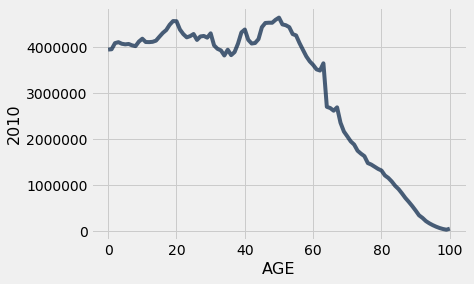

In [9]:
everyone.plot('AGE', '2010')

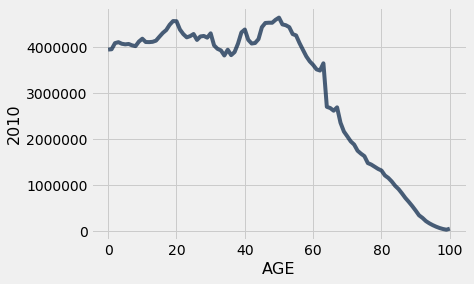

In [9]:
# US Population

everyone.plot('AGE', '2010')

US Population


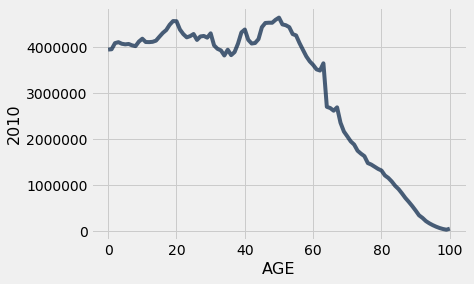

In [10]:
everyone.plot('AGE', '2010')
print('US Population')

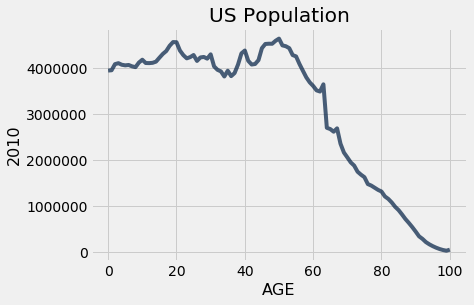

In [12]:
everyone.plot('AGE', '2010')
plots.title('US Population');    # OPTIONAL; not needed for Data 8

In [13]:
everyone.where('AGE', are.between(60, 71))

AGE,2010,2014
60,3616733,3985367
61,3520121,3834428
62,3495073,3685822
63,3652174,3572379
64,2706063,3488136
65,2678532,3384449
66,2621346,3347776
67,2693709,3485502
68,2359819,2572527
69,2167833,2535012


In [14]:
2010 - 63

1947

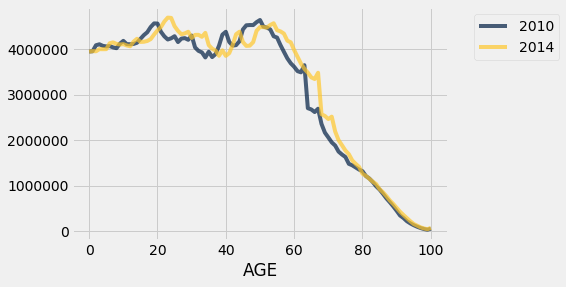

In [15]:
everyone.plot('AGE')

## Males and Females in 2014 ##

In [17]:
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [18]:
pop_2014 = Table().with_column(
    'Age', males.column('AGE'),
    'Males', males.column('2014'),
    'Females', females.column('2014')
)

In [19]:
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


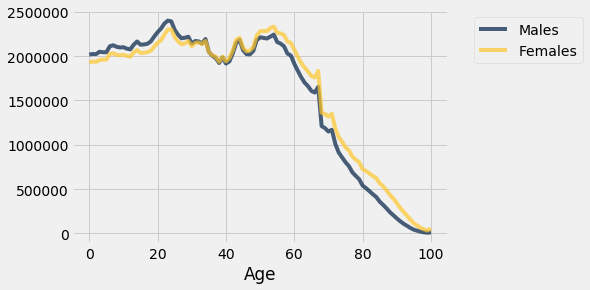

In [20]:
pop_2014.plot('Age')

In [21]:
total = pop_2014.column('Males') + pop_2014.column('Females')
percent_females = 100 * pop_2014.column('Females') / total
percent_females

array([48.89366444, 48.93512897, 48.89796583, 48.85091594, 48.95654945,
       48.9752945 , 48.95625723, 48.91092922, 48.89890191, 48.93212091,
       48.9734048 , 48.99969062, 48.99606517, 48.95633512, 48.86619665,
       48.88170995, 48.86445062, 48.88986227, 48.76308397, 48.668799  ,
       48.63932932, 48.5330796 , 48.66269094, 48.92327135, 49.03933504,
       49.08996242, 49.16509171, 49.21162965, 49.28169646, 49.44899983,
       49.65375766, 49.75983547, 49.86565039, 49.93824999, 49.74770193,
       49.99251351, 50.05521355, 50.20280862, 50.18189092, 50.10049432,
       50.31587643, 50.47966604, 50.40624483, 50.42907187, 50.23118137,
       50.32445422, 50.37830234, 50.53327291, 50.51106084, 50.55818402,
       50.75941276, 50.86725098, 50.93664868, 51.06392595, 50.97417608,
       51.18857886, 51.29709649, 51.45934869, 51.62031101, 51.70400468,
       51.97408419, 52.08985538, 52.15439053, 52.36152155, 52.36785492,
       52.49779211, 52.53185996, 52.56760719, 52.90700545, 53.15

In [23]:
percent_females = np.round(percent_females, 2)

In [24]:
counts_and_percents = pop_2014.with_column('Percent Female', percent_females)

In [25]:
counts_and_percents

Age,Males,Females,Percent Female
0,2017857,1930493,48.89
1,2023253,1938870,48.94
2,2022502,1935270,48.9
3,2048618,1956572,48.85
4,2043498,1959950,48.96
5,2043467,1961391,48.98
6,2110328,2024024,48.96
7,2122240,2031760,48.91
8,2105122,2014402,48.9
9,2097272,2009560,48.93


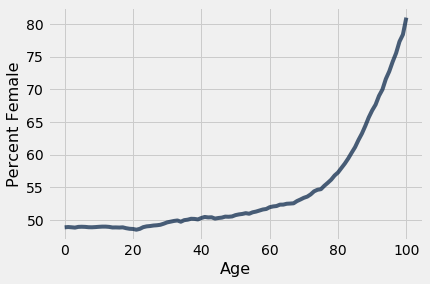

In [26]:
counts_and_percents.plot('Age', 'Percent Female')

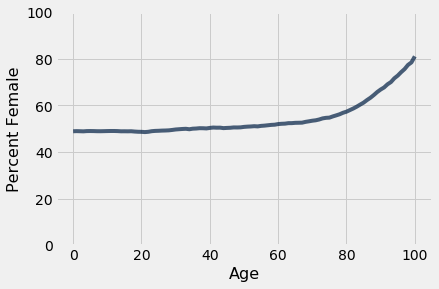

In [29]:
counts_and_percents.plot('Age', 'Percent Female')
plots.ylim(0, 100);      # Not needed for D8

## Scatter Plots ##

In [30]:
actors = Table.read_table('actors.csv')

In [31]:
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


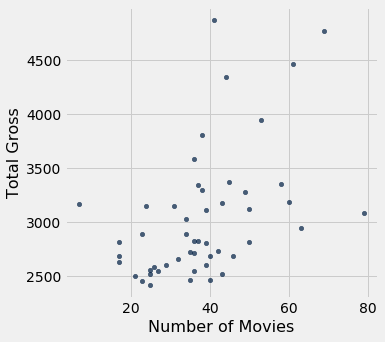

In [32]:
actors.scatter('Number of Movies', 'Total Gross')

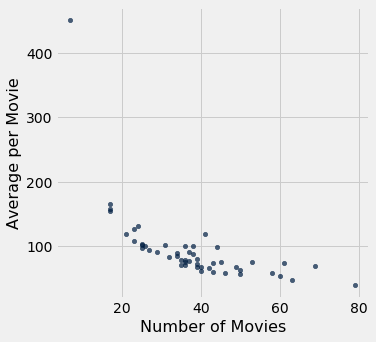

In [33]:
actors.scatter('Number of Movies', 'Average per Movie')

In [34]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

In [35]:
top_movies = Table.read_table('top_movies_2017.csv')

In [36]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [37]:
top_adjusted = top_movies.take(np.arange(10))

In [38]:
top_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [39]:
millions = np.round(top_adjusted.column('Gross (Adjusted)') / 1000000, 3)

In [40]:
top_adjusted = top_adjusted.with_column('Millions', millions)

In [41]:
top_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


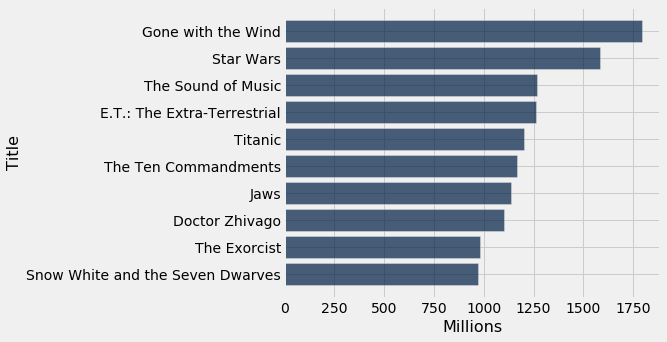

In [42]:
top_adjusted.barh('Title', 'Millions')

In [43]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


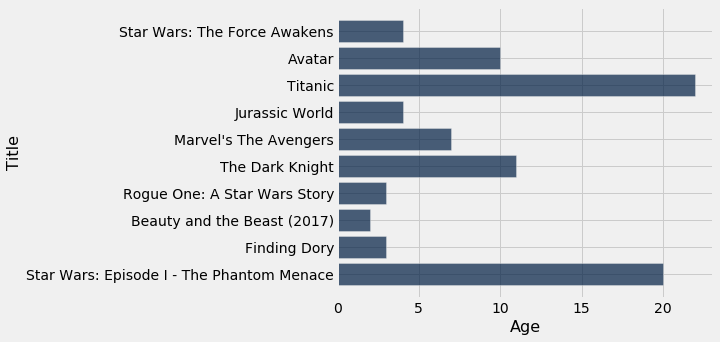

In [44]:
top_gross = top_movies.sort('Gross', descending=True).take(np.arange(10))
ages = 2019 - top_gross.column('Year')
top_gross = top_gross.with_column('Age', ages)
top_gross.barh('Title', 'Age')